In [2]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
from random import sample
from matplotlib import pyplot as plt

In [189]:
master_cat = Table.read('master_cat.fits')

In [190]:
master_cat


ID,RA_1,DEC_1,nlines,z_50,z_02,z_16,z_84,z_97,z_MAP,z_RISK,ArIII-7138_FLUX,ArIII-7138_FLUX_ERR,ArIII-7138_EW_RF_16,ArIII-7138_EW_RF_50,ArIII-7138_EW_RF_84,CIII-1908_FLUX,CIII-1908_FLUX_ERR,CIII-1908_EW_RF_16,CIII-1908_EW_RF_50,CIII-1908_EW_RF_84,CIV-1549_FLUX,CIV-1549_FLUX_ERR,CIV-1549_EW_RF_16,CIV-1549_EW_RF_50,CIV-1549_EW_RF_84,H8_FLUX,H8_FLUX_ERR,H8_EW_RF_16,H8_EW_RF_50,H8_EW_RF_84,H9_FLUX,H9_FLUX_ERR,H9_EW_RF_16,H9_EW_RF_50,H9_EW_RF_84,Ha_FLUX,Ha_FLUX_ERR,Ha_EW_RF_16,Ha_EW_RF_50,Ha_EW_RF_84,Hb_FLUX,Hb_FLUX_ERR,Hb_EW_RF_16,Hb_EW_RF_50,Hb_EW_RF_84,Hd_FLUX,Hd_FLUX_ERR,Hd_EW_RF_16,Hd_EW_RF_50,Hd_EW_RF_84,HeI-1083_FLUX,HeI-1083_FLUX_ERR,HeI-1083_EW_RF_16,HeI-1083_EW_RF_50,HeI-1083_EW_RF_84,HeI-5877_FLUX,HeI-5877_FLUX_ERR,HeI-5877_EW_RF_16,HeI-5877_EW_RF_50,HeI-5877_EW_RF_84,HeII-1640_FLUX,HeII-1640_FLUX_ERR,HeII-1640_EW_RF_16,HeII-1640_EW_RF_50,HeII-1640_EW_RF_84,Hg_FLUX,Hg_FLUX_ERR,Hg_EW_RF_16,Hg_EW_RF_50,Hg_EW_RF_84,Lya_FLUX,Lya_FLUX_ERR,Lya_EW_RF_16,Lya_EW_RF_50,Lya_EW_RF_84,MgII_FLUX,MgII_FLUX_ERR,MgII_EW_RF_16,MgII_EW_RF_50,MgII_EW_RF_84,NIII-1750_FLUX,NIII-1750_FLUX_ERR,NIII-1750_EW_RF_16,NIII-1750_EW_RF_50,NIII-1750_EW_RF_84,NIV-1487_FLUX,NIV-1487_FLUX_ERR,NIV-1487_EW_RF_16,NIV-1487_EW_RF_50,NIV-1487_EW_RF_84,NV-1240_FLUX,NV-1240_FLUX_ERR,NV-1240_EW_RF_16,NV-1240_EW_RF_50,NV-1240_EW_RF_84,NeIII-3867_FLUX,NeIII-3867_FLUX_ERR,NeIII-3867_EW_RF_16,NeIII-3867_EW_RF_50,NeIII-3867_EW_RF_84,NeV-3346_FLUX,NeV-3346_FLUX_ERR,NeV-3346_EW_RF_16,NeV-3346_EW_RF_50,NeV-3346_EW_RF_84,NeVI-3426_FLUX,NeVI-3426_FLUX_ERR,NeVI-3426_EW_RF_16,NeVI-3426_EW_RF_50,NeVI-3426_EW_RF_84,OI-6302_FLUX,OI-6302_FLUX_ERR,OI-6302_EW_RF_16,OI-6302_EW_RF_50,OI-6302_EW_RF_84,OII_FLUX,OII_FLUX_ERR,OII_EW_RF_16,OII_EW_RF_50,OII_EW_RF_84,OII-7325_FLUX,OII-7325_FLUX_ERR,OII-7325_EW_RF_16,OII-7325_EW_RF_50,OII-7325_EW_RF_84,OIII_FLUX,OIII_FLUX_ERR,OIII_EW_RF_16,OIII_EW_RF_50,OIII_EW_RF_84,OIII-1663_FLUX,OIII-1663_FLUX_ERR,OIII-1663_EW_RF_16,OIII-1663_EW_RF_50,OIII-1663_EW_RF_84,OIII-4363_FLUX,OIII-4363_FLUX_ERR,OIII-4363_EW_RF_16,OIII-4363_EW_RF_50,OIII-4363_EW_RF_84,PaB_FLUX,PaB_FLUX_ERR,PaB_EW_RF_16,PaB_EW_RF_50,PaB_EW_RF_84,SII_FLUX,SII_FLUX_ERR,SII_EW_RF_16,SII_EW_RF_50,SII_EW_RF_84,SIII_FLUX,SIII_FLUX_ERR,SIII_EW_RF_16,SIII_EW_RF_50,SIII_EW_RF_84,HeII-4687_FLUX,HeII-4687_FLUX_ERR,HeII-4687_EW_RF_16,HeII-4687_EW_RF_50,HeII-4687_EW_RF_84,T_G102,T_G141,BIC_TEMP,CHIMIN,DOF,subfield,id,ra,dec,z_spec,nusefilt,lc_min,lc_max,z_phot,z_phot_chi2,z_phot_risk,z_min_risk,min_risk,z_raw_chi2,raw_chi2,z025,z160,z500,z840,z975,restU,restU_err,restB,restB_err,restV,restV_err,restJ,restJ_err,dL,mass,sfr,Lv,LIR,MLv,Av,mass_p,sfr_p,Lv_p,LIR_p,ssfr_p,rest270,rest270_err,rest274,rest274_err,rest120,rest120_err,rest121,rest121_err,rest156,rest156_err,rest157,rest157_err,rest158,rest158_err,rest159,rest159_err,rest160,rest160_err,rest161,rest161_err,rest162,rest162_err,rest163,rest163_err,DISTMOD,ABSM_271,ABSM_272,ABSM_274,NUMBER,RA_2,DEC_2,f,mag,dmag,re,dre,n,dn,q,dq,pa,dpa,sn,field
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,solMass,solMass / yr,solLum,solLum,solMass / solLum,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int32,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,flo

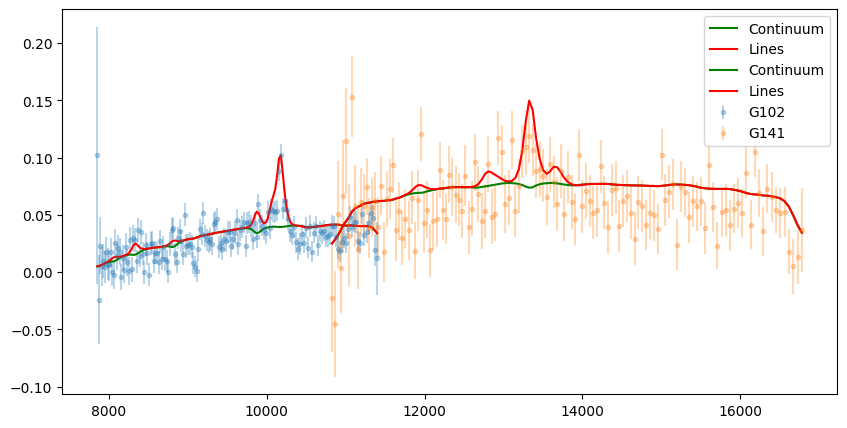

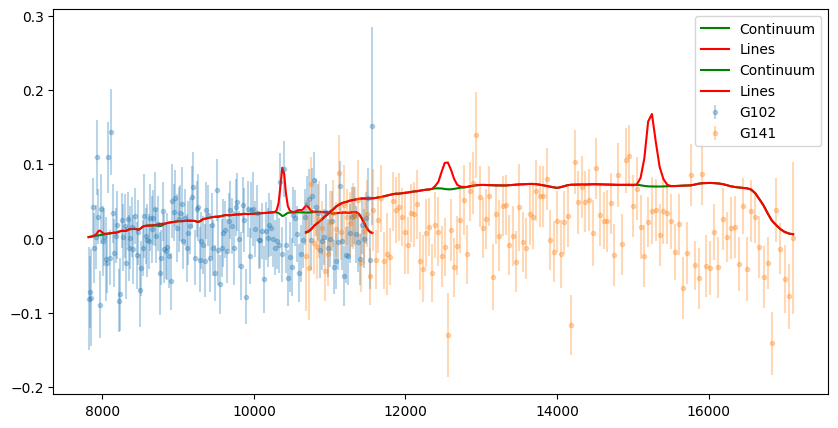

In [293]:
for obj in master_cat[sample(range(len(master_cat)), 2)]:
    id = obj['id']
    field = obj['subfield']
    
    data_path = f'data/{field.lower()}/{field.lower()}_{str(id).zfill(5)}_1d.fits'
    with fits.open(data_path) as hdul:
        plt.figure(figsize=(10,5))
        for hdu in hdul:
            if hdu.name in ['G102','G141']:
                wave, flux, err, contam, line, cont = hdu.data['wave'], hdu.data['flux'], hdu.data['err'], hdu.data['contam'], hdu.data['line'], hdu.data['cont']
                mask = flux != 0
                wave, flux, err = wave[mask], flux[mask], err[mask]
                plt.errorbar(wave, flux, yerr=err,label=f'{hdu.name}', fmt='.', alpha=0.3)
#                plt.plot(wave, contam[mask], color='orange', linestyle='--', alpha=0.7)
                plt.plot(wave, cont[mask], color='green', label='Continuum')
                plt.plot(wave, line[mask], color='red', label='Lines')
        plt.legend()


# 